# librosa 이용해서 음성데이터 읽기

+ 데이터: 자유대화 음성(일반남녀) 샘플 https://aihub.or.kr/aidata/30703
+ 참고사이트: https://hyongdoc.tistory.com/404?category=884319

In [23]:
import librosa, librosa.display
from glob import glob

In [12]:
audio_path = 'data/sample_freetalk/원천데이터/1.AI챗봇/1.일반남여_일반통합05_M_1521450504_34_전라_실내/일반남여_일반통합05_M_1521450504_34_전라_실내_06726.wav'
y, sr = librosa.load(audio_path)

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

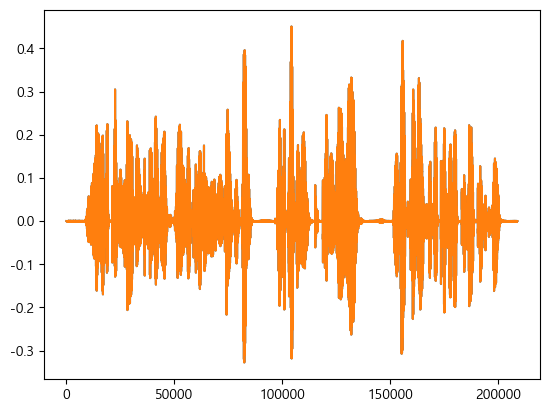

In [16]:
plt.plot(y)
plt.show()

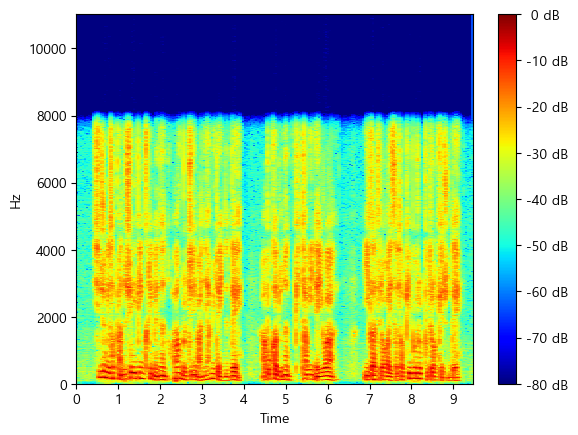

In [27]:
stft_result = librosa.stft(y, n_fft=4096, win_length = 4096, hop_length=1024)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='linear', x_axis='time', cmap = plt.cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

In [20]:
sr

22050

In [32]:
n_fft = 2048
win_length = 2048
hop_length = 1024
n_mels = 1024

C:\Users\wlsth\anaconda3\envs\tf2\lib\site-packages\librosa\filters.py:239: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  "Empty filters detected in mel frequency basis. "


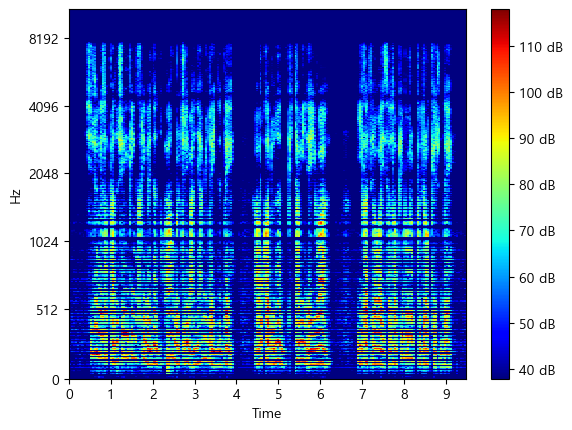

In [33]:
D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length = hop_length, y_axis='mel', x_axis='time', cmap = plt.cm.jet)
plt.colorbar(format='%2.0f dB')
plt.show()

In [35]:
freqs = librosa.cqt_frequencies(108, librosa.note_to_hz('C1'))
aw = librosa.A_weighting(freqs)
plt.plot(freqs, aw)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Weighting (log10)')
plt.title('A-Weighting of CQT frequencies')

Text(0.5, 1.0, 'A-Weighting of CQT frequencies')

In [61]:
D = np.abs(librosa.stft(y, n_fft=n_fft, win_length = win_length, hop_length=hop_length))
mfcc = librosa.feature.mfcc(S=librosa.power_to_db(D), sr=sr, n_mfcc=5)

In [62]:
print(D.shape, mfcc.shape)

(1025, 204) (5, 204)


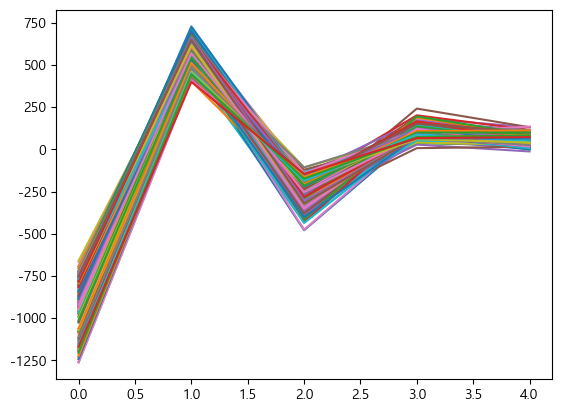

In [63]:
plt.plot(mfcc)
plt.show()

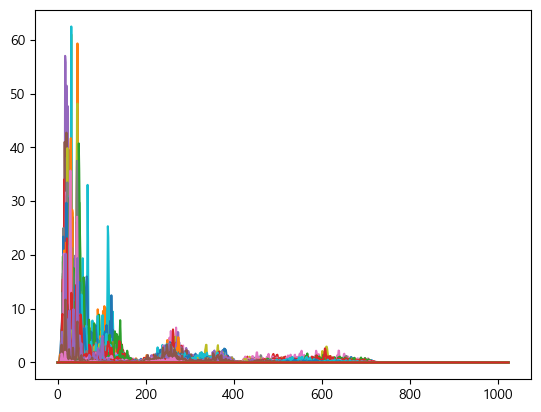

In [64]:
plt.plot(D)
plt.show()

In [65]:
import json

In [71]:
# 라벨

label_path = 'data/sample_freetalk/라벨링데이터/1.AI챗봇/1.일반남여_일반통합05_M_1521450504_34_전라_실내/일반남여_일반통합05_M_1521450504_34_전라_실내_06726.json'
with open(label_path, "r", encoding='utf-8') as f:
    contens = f.read()
    label = json.loads(contens)
    
label

{'발화정보': {'stt': '시중에서 파는 쉐이빙 크림에는 화학물질이 많이 함유돼 있는데 아보카도는 비타민 에이와 이가 들어가 있어서 피부를 부드럽게 해준데',
  'scriptId': '일반통합-06726',
  'fileNm': '일반남여_일반통합05_M_1521450504_34_전라_실내_06726.wav',
  'recrdTime': '9.470',
  'recrdQuality': '16K',
  'recrdDt': '2020-11-20 16:20:30',
  'scriptSetNo': 'T_일반통합_5'},
 '대화정보': {'recrdEnvrn': '실내',
  'colctUnitCode': 'AI 챗봇',
  'cityCode': '전라',
  'recrdUnit': 'iOS',
  'convrsThema': '아보카도, 피부에 양보하세요'},
 '녹음자정보': {'gender': '남', 'recorderId': '1521450504', 'age': 34}}